In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import keras, os, cv2, pickle
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import cvlib as cv
from cvlib.object_detection import draw_bbox

In [31]:
#load the model
with open('E:\\deepika_fyp\\final_year_pro\\model\\svm-vgg-16.h5', 'rb') as file:
    cnn = pickle.load(file)

#load the pretrained model and the weights
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))

#Function to read and store the photos in a list
def read_images():
    path='E:\\deepika_fyp\\final_year_pro\\data\\Combination'
    for file in os.listdir(path):
        list1.append(cv2.imread(os.path.join(path,file)))    
        


In [32]:
list1=[]
rank={}
label_dict={}
bbox_dict={}
conf_dict={}
query=[]

read_images()

# Load image, grayscale, threshold
image = cv2.imread('C:\\Users\deepi\\Pictures\\sample.png')
image2 = cv2.imread('C:\\Users\deepi\\Pictures\\sample.png')
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
_,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

# Find contours
cnts = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(cnts[0])):
    c = cnts[0][i]
    # Obtain outer coordinates
    left = tuple(c[c[:, :, 0].argmin()][0])
    right = tuple(c[c[:, :, 0].argmax()][0])
    top = tuple(c[c[:, :, 1].argmin()][0])
    bottom = tuple(c[c[:, :, 1].argmax()][0])
    
    #Draw bounding box using the extra coordinates
    cv2.rectangle(image2,(left[0]-10, top[1]-10), (right[0]+10, bottom[1]+10), (255,125,100), 2)
    #Crop and save images using original coordinates
    crop = image[top[1]:bottom[1], left[0]:right[0]]
    
    cv2.imwrite("D:\\Downloads-Chrome\\png - Copy\\cropped%i.png"%(i+1) ,crop)
#Display bounded boxed sketch 
cv2.imshow('image', image)
cv2.imshow('rectangled_image', image2)
cv2.imwrite("D:\\Downloads-Chrome\\png - Copy\\rect.png ",image2)

cv2.waitKey(0)
cv2.destroyAllWindows()


['airplane', 'apple', 'banana', 'bicycle', 'car', 'cat', 'chair', 'cup', 'duck', 'elephant', 'fire hydrant', 'knife', 'pizza', 'teddy bear', 'train']


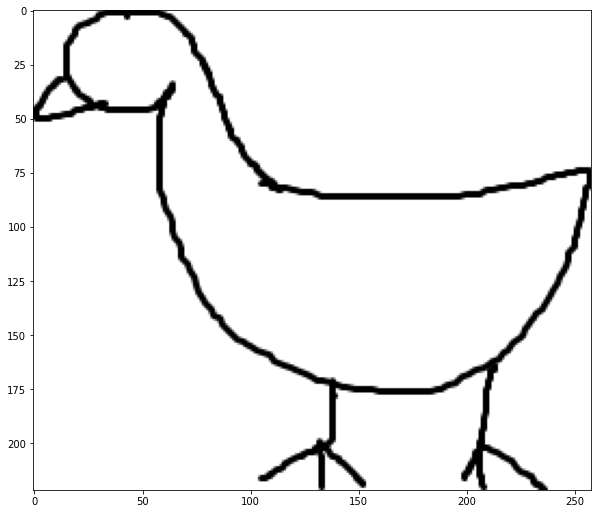

The image is classified as: bird


In [33]:
fig=plt.figure(figsize=(10, 10))

#Class names in a string
string1="airplane,apple,banana,bicycle,car,cat,chair,duck,teddy bear,pizza,fire hydrant,train,elephant,knife,cup"
class_names=sorted(list(string1.split(",")))

for i in range(len(cnts[0])):
    img = cv2.imread("D:\\Downloads-Chrome\\png - Copy\\cropped%i.png"%(i+1))
    fig.add_subplot(len(cnts[0]), 1, i+1)
    plt.imshow(img)
    plt.show()
    img = cv2.resize(img, (100,100))
    input_img = np.expand_dims(img, axis=0)
    
    #Predict individual sketch features
    input_img_feature = vgg.predict(input_img)
    input_img_features = input_img_feature.reshape(input_img_feature.shape[0],-1)
    
    #Predict individual sketch class using SVM
    prediction_SVM = cnn.predict(input_img_features)[0]
    prediction=class_names[prediction_SVM]
    query.append(prediction)
    if 'duck' in query:
        i=query.index('duck')
        query[i]='bird'
    print('The image is classified as:',query[i])


In [34]:
print(query)


['bird']


In [35]:
   
def get_rank_query_label_difference(i,label1,flag):
    #obtain count of query classes in label1
        for j in query:
            if j in label1:
                flag+=1
    #find difference to rank the photos    
        if (len(query)-flag)==0:
            rank[i]=1
        elif (len(query)-flag)==1:
            rank[i]=2
        else:
            rank[i]=3

In [36]:
rank={}

for i in range(0,len(list1)):
    im = list1[i]
    
    #Perform object detection on photos stored in the list
    bbox, label, conf = cv.detect_common_objects(im)
    label1=[]
    bbox1=[]
    conf1=[]
    flag=0
    for param in label:
        if param in query:
            
            #Read labels and compare with query to save only query labels
            index=label.index(param)
            label1.append(param)
            bbox1.append(bbox[index])
            conf1.append(conf[index])
            label[index]="null"
                                                             
    
    if label1 !=[]:
        
        #Save the bounding box coordinates for the query labels 
        print("IMAGE {0} contains queries".format(i+1))
        label_dict["label{0}".format(i)]=label1
        bbox_dict["bbox{0}".format(i)]=bbox1
        conf_dict["conf{0}".format(i)]=conf1
        
        #Find ranking for every photo
        get_rank_query_label_difference(i,label1,flag)            

#Sort photos in order of rank        
sort_orders = sorted(rank.items(), key=lambda x: x[1], reverse=False)


IMAGE 6 contains queries
IMAGE 7 contains queries
IMAGE 8 contains queries
IMAGE 10 contains queries
IMAGE 12 contains queries
IMAGE 16 contains queries
IMAGE 17 contains queries
IMAGE 20 contains queries
IMAGE 21 contains queries
IMAGE 28 contains queries
IMAGE 30 contains queries
IMAGE 34 contains queries
IMAGE 38 contains queries
IMAGE 50 contains queries
IMAGE 54 contains queries
IMAGE 60 contains queries
IMAGE 62 contains queries
IMAGE 63 contains queries
IMAGE 68 contains queries
IMAGE 74 contains queries
IMAGE 80 contains queries
IMAGE 81 contains queries
IMAGE 85 contains queries
IMAGE 86 contains queries
IMAGE 90 contains queries
IMAGE 91 contains queries
IMAGE 97 contains queries
IMAGE 98 contains queries


In [37]:
print("\nSorted dictionary:\n", sort_orders)
print("Total number of images retrieved: ",len(sort_orders))


Sorted dictionary:
 [(5, 1), (6, 1), (7, 1), (9, 1), (11, 1), (15, 1), (16, 1), (19, 1), (20, 1), (27, 1), (29, 1), (33, 1), (37, 1), (49, 1), (53, 1), (59, 1), (61, 1), (62, 1), (67, 1), (73, 1), (79, 1), (80, 1), (84, 1), (85, 1), (89, 1), (90, 1), (96, 1), (97, 1)]
Total number of images retrieved:  28


In [38]:
for i in sort_orders:
    im=list1[i[0]]
    
    #Draw bounding box around the objects and display the output
    output_image = draw_bbox(im, bbox_dict["bbox{0}".format(i[0])], label_dict["label{0}".format(i[0])], conf_dict["conf{0}".format(i[0])])
    cv2.imshow("image {0} with rank: ".format(i[0])+ str(i[1]),output_image)
    cv2.imwrite('E:\\deepika_fyp\\final_year_pro\\photos_bounded\\photo%i.png'(i+1),output_image)
    cv2.waitKey(0)                    
    cv2.destroyAllWindows()  
   